    Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.


    Data Description:
 
    The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

   - ID --Unique ID
   - Balance--Number of miles eligible for award travel
   - Qual_mile--Number of miles counted as qualifying for Topflight status
   - cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
   - cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
   - cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

    
    1 = under 5,000
    2 = 5,000 - 10,000
    3 = 10,001 - 25,000
    4 = 25,001 - 50,000
    5 = over 50,000


   - Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

   - Bonus_trans--Number of non-flight bonus transactions in the past 12 months

   - Flight_miles_12mo--Number of flight miles in the past 12 months

   - Flight_trans_12--Number of flight transactions in the past 12 months

   - Days_since_enrolled--Number of days since enrolled in flier program

   - Award--whether that person had award flight (free flight) or not

### Importing Libraries and Reading the data file

In [1]:
# Importing the Basic libraries 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

# to remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
airline = pd.read_csv('EastWestAirlines.csv')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Performing EDA on the data

In [3]:
# to get the information of the datafile
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# to get the information of the datafile
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
# summarizing the datafile
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
# to check the null values of the data
airline.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
print("Dimensions -",airline.shape)
print("Column names -",airline.columns)

Dimensions - (3999, 12)
Column names - Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


# Hierarchical Clustering

In [8]:
# importing required libraries 
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
from sklearn.cluster import AgglomerativeClustering # Hierarchical Clustering

### Normalization

In [9]:
# using MinMaxScaler() to normalise the data(numerical cols)
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(airline.iloc[:,1:]))
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


### Creating Dendrogram Structure 

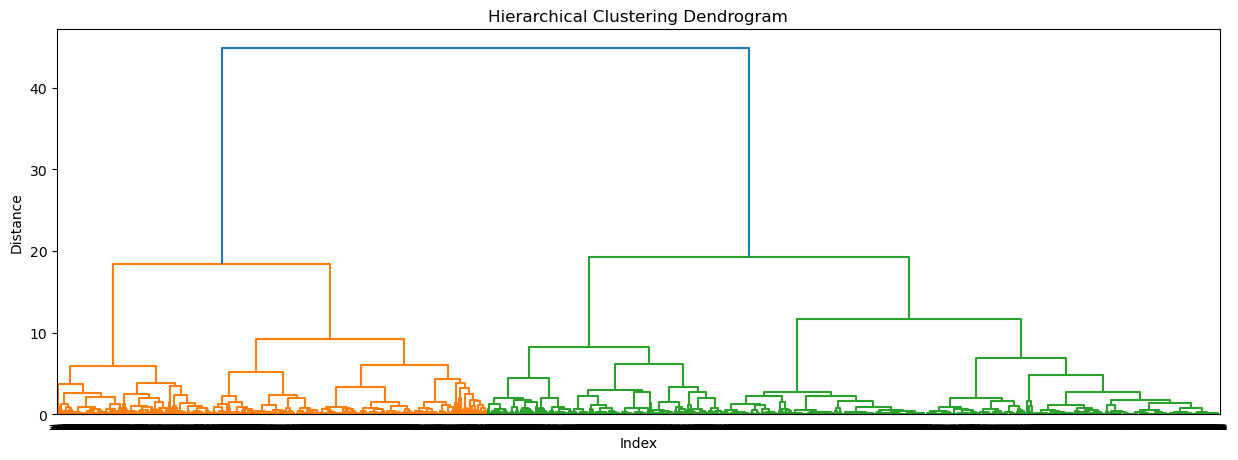

In [10]:
z = linkage(data, method="ward",metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,leaf_rotation=1.0)
plt.show()

### Creating Hierarchical cluster

In [11]:
# creating hierarchical cluster
h_clus = AgglomerativeClustering(n_clusters=5,linkage='ward',
                                 affinity='euclidean').fit(data)
clust_labels = pd.Series(h_clus.labels_)
clust_labels

# creating new column and assigning to new column
clus_df = airline.copy()
clus_df['Cluster'] = clust_labels
clus_df.head(15)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0


In [12]:
# using groupby func for the summarization of data by clusters
clus_df.iloc[:,1:].groupby(clus_df.Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
Cluster,,,,,,,,,,,,
0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0,0.0
1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0,1.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0,2.0
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0,3.0
4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,4.0


### Inferences

In [13]:
# Passengers from cluster 0
clus_df[(clus_df.Cluster==0)]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,0
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [14]:
# Passengers from cluster 3
clus_df[(clus_df.Cluster==3)]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,3
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,3
20,21,120576,0,5,1,1,58831,23,250,2,6896,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,3
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,3
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,3


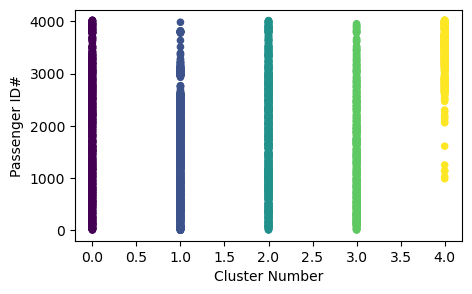

In [15]:
# Plotting the Clusters
plt.figure(figsize=(5,3))
plt.scatter(clus_df['Cluster'],clus_df['ID#'], c=h_clus.labels_,s=20)
plt.xlabel('Cluster Number')
plt.ylabel('Passenger ID#')
plt.show()

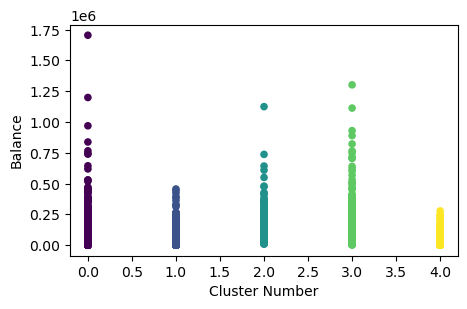

In [16]:
plt.figure(figsize=(5,3))
plt.scatter(clus_df['Cluster'],clus_df['Balance'], c=h_clus.labels_,s=20)
plt.xlabel('Cluster Number')
plt.ylabel('Balance')
plt.show()

# K-Means Clustering 

In [17]:
# Importing KMeans function from sklearn library
from sklearn.cluster import KMeans

In [18]:
# Ten observations of the data set
airline.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


### Normalization 

In [19]:
# using MinMaxScaler() to normalise the data(numerical cols)
trans1 = MinMaxScaler()
data1 = pd.DataFrame(trans1.fit_transform(airline.iloc[:,1:]))
data1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


### Elbow Curve for K value

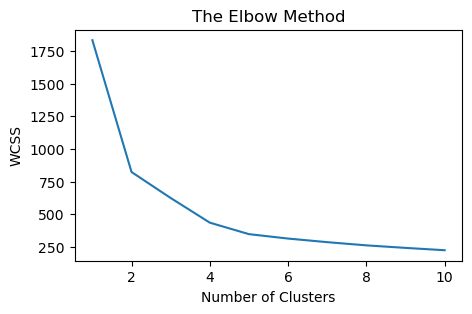

In [20]:
# plotting using ELBOW method to select best k value

fig = plt.figure(figsize=(5,3))
# WCSS - within cluster sum of square
WCSS = []
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(data1)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Creating K-Means cluster

In [21]:
# Prediction of the clusters to which the observations belong
clf = KMeans(n_clusters=6)
y_kmeans = clf.fit_predict(data1)
y_kmeans

array([1, 1, 1, ..., 3, 5, 5])

In [22]:
# to get the centers of the clusters
clf.cluster_centers_

array([[ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01, -3.88578059e-16],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 4.06814007e-02,  1.48463039e-02,  6.36543536e-01,
         6.07153217e-18,  3.29815303e-03,  1.26297684e-01,
         2.19120083e-01,  1.85104973e-02,  3.25583711e-02,
         3.97683292e-01,  1.00000000e+00],
       [ 8.37255676e-02,  2.03929249e-02,  8.10606061e-01,
         1.16550117e-03,  9.32400932e-03,  2.14203100e-01,
  

In [23]:
# to get the within cluster sum of square variance
clf.inertia_

315.315596484289

In [24]:
# converting numpy array into pandas series object
a = pd.Series(y_kmeans)
clus_df1 = airline.copy()
clus_df1['Cluster'] = a
clus_df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,5


In [25]:
# using groupby func for the summarization of data by clusters
clus_df1.iloc[:,1:12].groupby(clus_df1.Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
1,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
3,69355.197889,165.506596,3.546174,1.000000,1.013193,33302.804749,18.844327,570.437995,1.725594,3300.385224,1.0
4,142738.529138,227.340326,4.242424,1.002331,1.037296,56482.144522,21.400932,840.319347,2.510490,6244.319347,1.0
5,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0


### Inferences

In [26]:
# checking the passengers belonging to the cluster 4 who were awarded free flight 
clus_df1[(clus_df1.Cluster==4)]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,4
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,4
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,4
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,2380,146232,0,5,1,1,83783,19,375,1,3566,1,4
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1,4
2413,2432,190674,4704,5,1,1,104159,33,4754,15,3396,1,4
2489,2508,704113,0,5,1,1,98119,23,0,0,3082,1,4


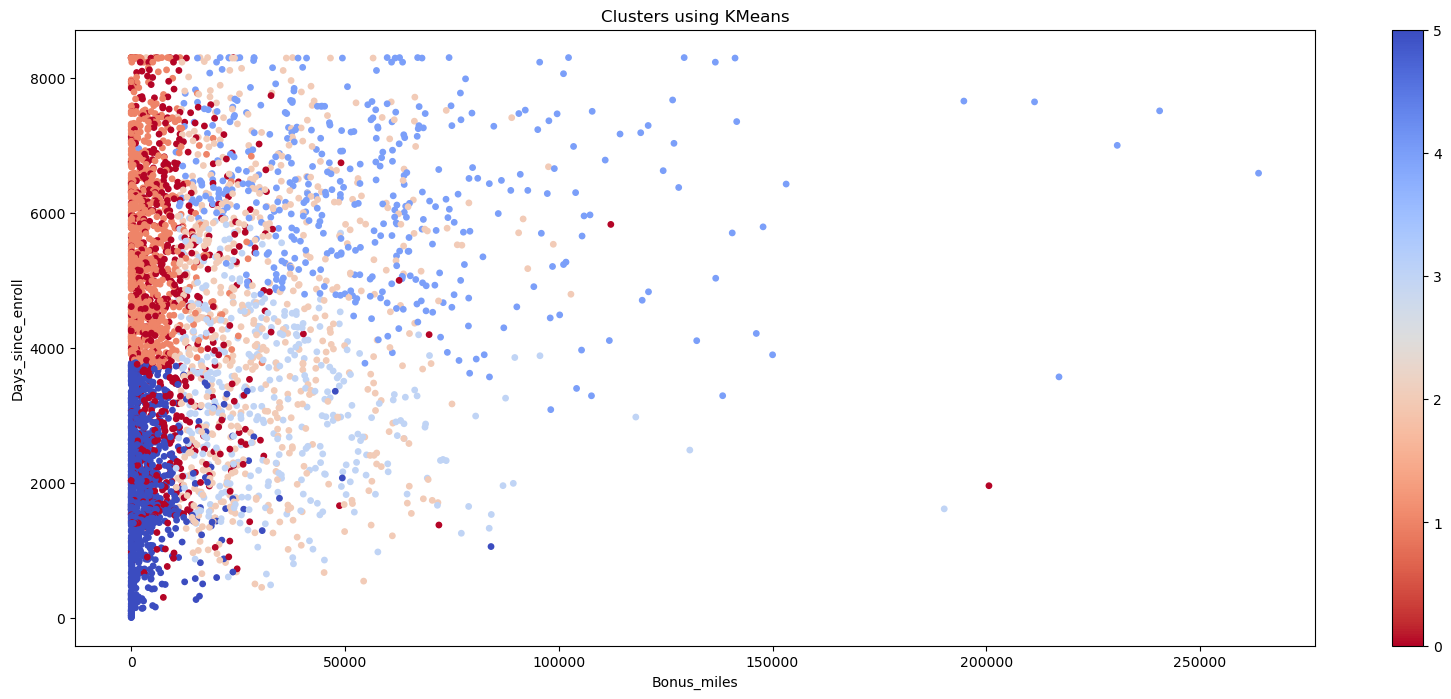

In [27]:
clus_df1.plot(x="Bonus_miles",y="Days_since_enroll",c=clf.labels_,kind='scatter',
           s=15,cmap=plt.cm.coolwarm_r,figsize=(20,8))
plt.title("Clusters using KMeans")
plt.show()

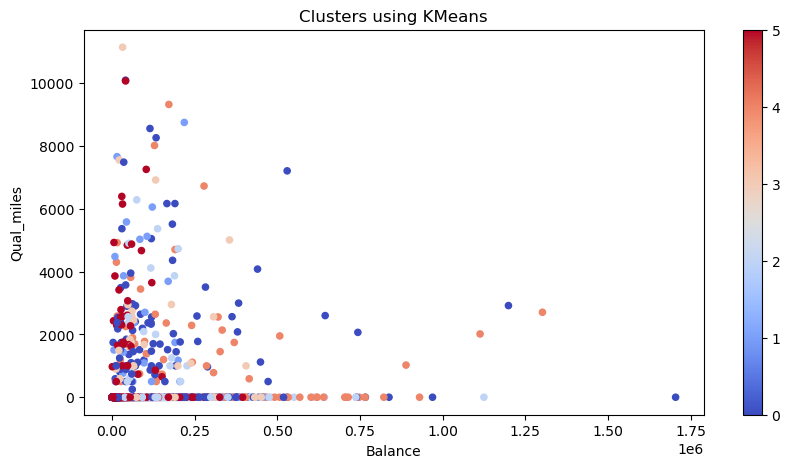

In [28]:
clus_df1.plot(x="Balance",y="Qual_miles",c=clf.labels_,kind='scatter',
           s=20,cmap=plt.cm.coolwarm,figsize=(10,5))
plt.title("Clusters using KMeans")
plt.show()

### Observations

- The cluster 4 has more fliers with more bonus miles and more passengers were awarded free flight. 

# DBSCAN Clustering

In [29]:
# importing required libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [30]:
# head of the data set
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Standardizing the data

In [31]:
# Standardizing the data using StandardScaler function
std = StandardScaler().fit(airline.values)
trans2 = std.transform(airline.values)
trans2

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

### Elbow Curve for Epsilon(eps) value

In [32]:
# To get the best epsilon value using ELBOW curve

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=22) # 2n; n-no.of variables
nbrs = neigh.fit(trans2)
distances, indices = nbrs.kneighbors(trans2)

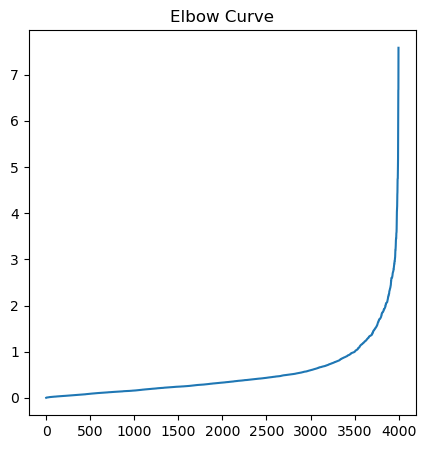

In [33]:
# plotting the distances to get epsilon value
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(5,5))
plt.plot(distances)
plt.title('Elbow Curve')
plt.show()

### Creating DBSCAN cluster

In [34]:
dbscan = DBSCAN(eps=2.5, min_samples=12)
# Here min_samples >= D+1 where D- Dimensions of data
dbscan.fit(trans2)

DBSCAN(eps=2.5, min_samples=12)

In [35]:
# To identify the Noisy samples(outliers).. they're given -1 label
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
# creating dataframe for cluster column 
cl = pd.DataFrame(dbscan.labels_, columns=['Cluster'])
cl

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [37]:
# combining the cluster dataframe with data
clus_df2 = pd.concat([airline,cl],axis=1)
clus_df2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


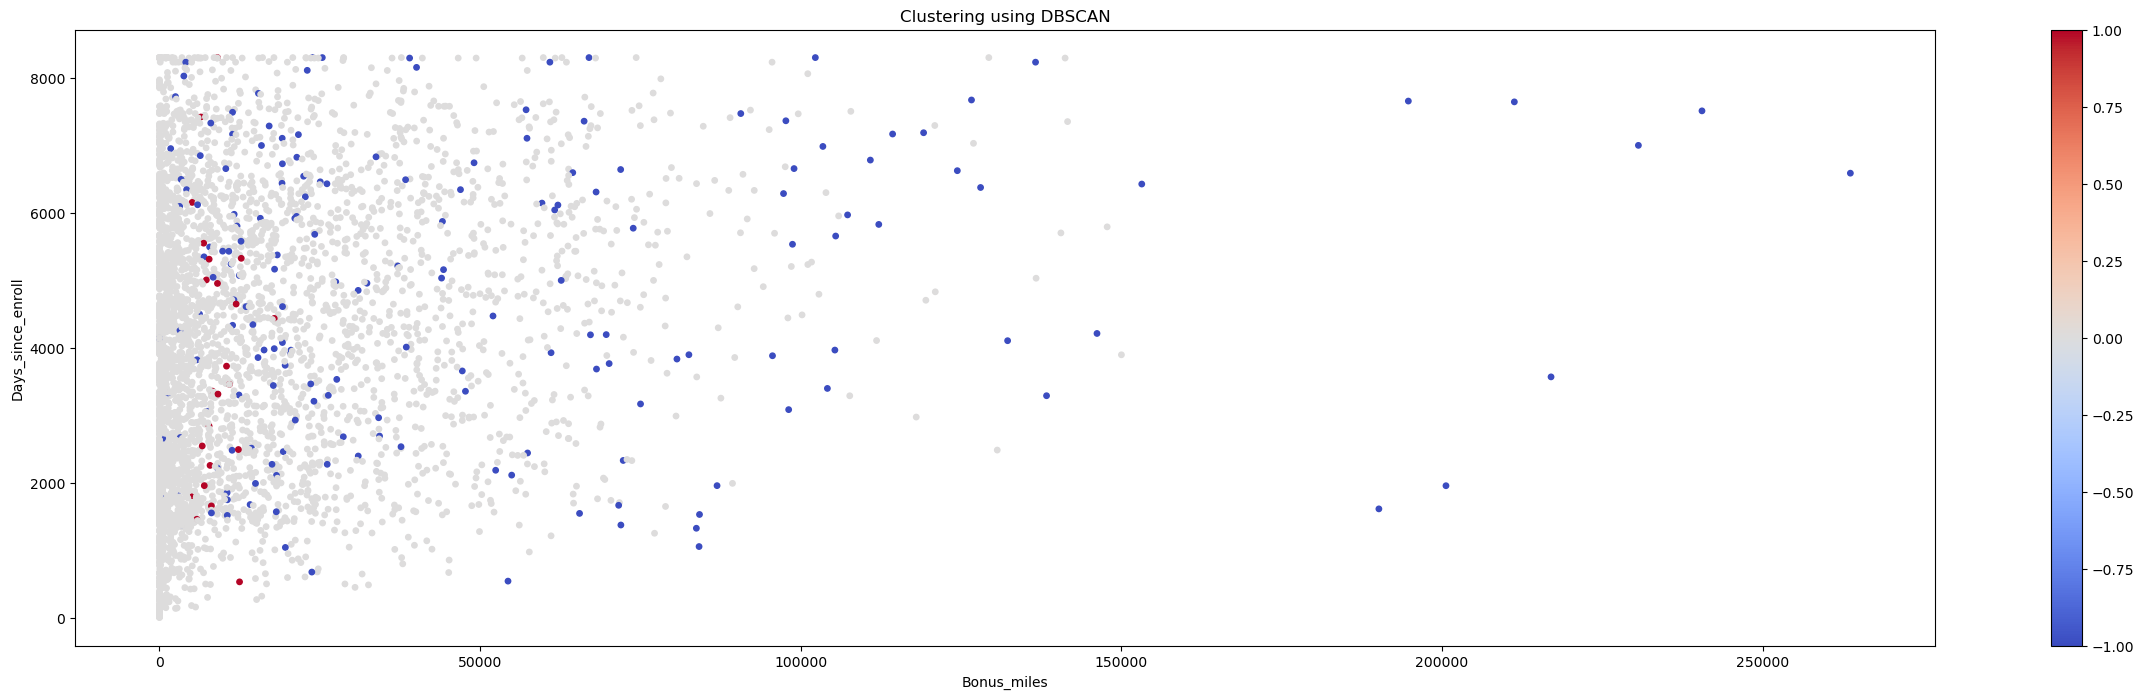

In [38]:
# Plotting the clusters
clus_df2.plot(x='Bonus_miles',y='Days_since_enroll',c=dbscan.labels_,kind="scatter",
              s=15,cmap=plt.cm.coolwarm,figsize=(30,8))
plt.title("Clustering using DBSCAN")
plt.show()

In [39]:
# to get silhouette score
import sklearn
sklearn.metrics.silhouette_score(trans2,dbscan.labels_)

0.5115366746010604

### Inferences

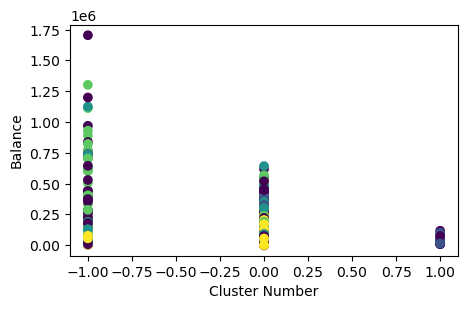

In [40]:
plt.figure(figsize=(5,3))
plt.scatter(clus_df2['Cluster'],clus_df2['Balance'], c=h_clus.labels_)
plt.xlabel('Cluster Number')
plt.ylabel('Balance')
plt.show()

In [41]:
# using groupby func for the summarization of data by clusters
clus_df2.iloc[:,1:].groupby(clus_df2.Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
Cluster,,,,,,,,,,,,
-1,237483.280899,1729.314607,2.662921,1.196629,1.275281,50294.674157,25.938202,3683.865169,10.584270,4833.056180,0.735955,-1.0
0,66126.346235,70.694049,2.037651,1.000000,1.000000,15640.771722,10.917062,310.409426,0.945498,4086.721959,0.353607,0.0
1,39644.434783,0.000000,1.000000,2.000000,1.000000,8962.478261,13.739130,221.739130,0.782609,3846.304348,0.304348,1.0


In [42]:
# the cluster -1 has more fliers with more bonuses and more were awarded free flight
clus_df2[(clus_df2.Cluster==-1)]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,-1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
70,72,84409,5031,2,1,1,15436,16,1150,4,7766,0,-1
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,-1
3897,3920,179832,2954,3,1,1,18218,20,2500,5,1569,1,-1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,-1


### Observations

- The cluster -1 has more fliers with more bonuses and more were awarded free flight